In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import seaborn as sns
import os
import sys
import pickle
from glob import glob

sns.set(style='ticks', context='notebook', font_scale=1.2)

## Analysis of dataset

In [2]:
molcats = ['H3S', 'NH4', 'MS', 'MA', 'MP', 'FA', 'EA', 'G', 'AA', 'ED', 'tBA']
metals = ['Be', 'Mg', 'Ca', 'Sr', 'Ba', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Pd', 'Pt', 'Cu', 'Ag',
      'Au', 'Zn', 'Cd', 'Hg', 'Ga', 'In', 'Tl', 'Si', 'Ge', 'Sn', 'Pb', 'Bi', 'S', 'Se', 'Te']
halogens = ['F', 'Cl', 'Br', 'I']

In [3]:
df = pd.read_csv('reference-and-data/df_results.csv')
print(df.shape)
df.head()

(111, 10)


,E_hull,mu_mu_B,m_star,m_e_star,m_h_star,E_f,bandgap,molcat,metal,halogen
0,0.0,0.0,7.11,7.14,>1000,-0.565,2.54,H3S,In,Cl
1,0.0,20.0,44.46,>1000,44.46,-0.467,1.52,MP,Mn,Cl
2,0.0,0.0,0.34,0.35,6.64,-1.056,4.00,NH4,Ca,Br
3,0.0,0.0,0.52,1.09,0.99,-0.415,3.06,MP,Ge,Cl
4,0.0,0.0,363.95,>1000,417.06,-0.231,1.03,H3S,Te,Br


In [4]:
molcat_counts = df['molcat'].value_counts().to_dict()
metal_counts = df['metal'].value_counts().to_dict()
halogen_counts = df['halogen'].value_counts().to_dict()

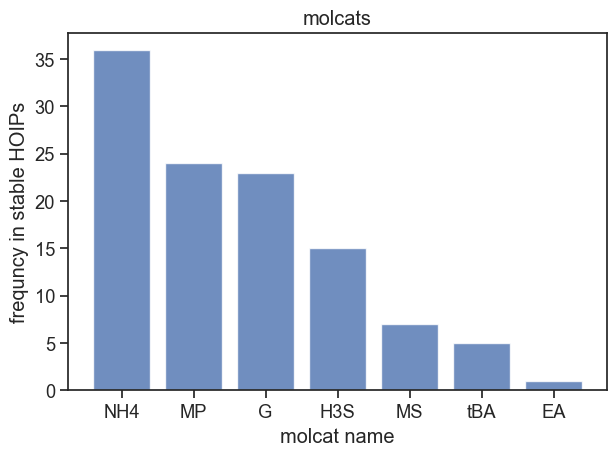

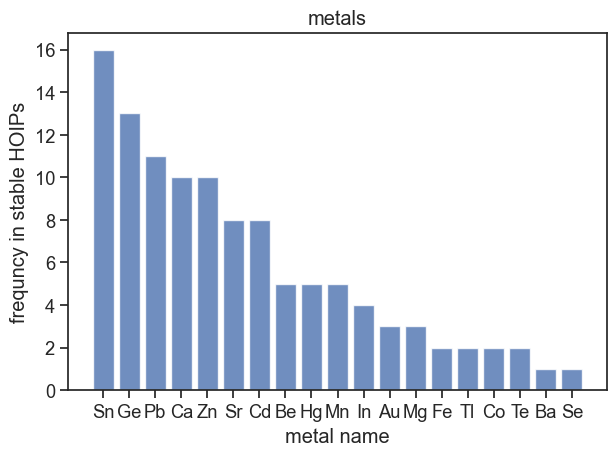

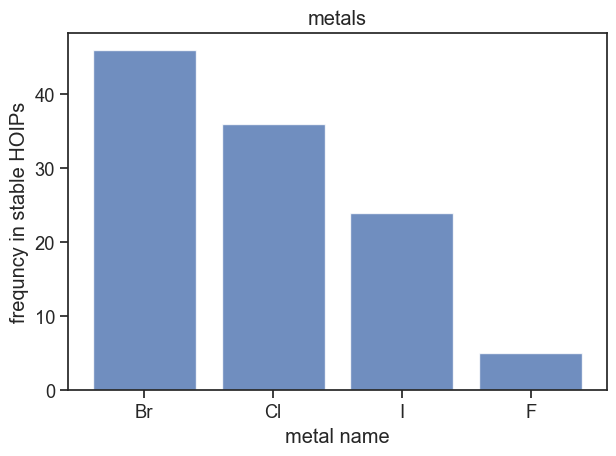

In [5]:
#----------
# molcats
#----------
fig, ax = plt.subplots()

y_pos = np.arange(len(molcat_counts))
counts = list(molcat_counts.values())
labels = list(molcat_counts.keys())

ax.bar(y_pos, counts, align='center', alpha=0.8)
ax.set_xticks(y_pos, labels)

ax.set_ylabel('frequncy in stable HOIPs')
ax.set_xlabel('molcat name')
ax.set_title('molcats')

plt.tight_layout()


#----------
# metals
#----------
fig, ax = plt.subplots()

y_pos = np.arange(len(metal_counts))
counts = list(metal_counts.values())
labels = list(metal_counts.keys())

ax.bar(y_pos, counts, align='center', alpha=0.8)
ax.set_xticks(y_pos, labels)

ax.set_ylabel('frequncy in stable HOIPs')
ax.set_xlabel('metal name')
ax.set_title('metals')

plt.tight_layout()

#----------
# halogen
#----------
fig, ax = plt.subplots()

y_pos = np.arange(len(halogen_counts))
counts = list(halogen_counts.values())
labels = list(halogen_counts.keys())

ax.bar(y_pos, counts, align='center', alpha=0.8)
ax.set_xticks(y_pos, labels)

ax.set_ylabel('frequncy in stable HOIPs')
ax.set_xlabel('metal name')
ax.set_title('metals')

plt.tight_layout()




In [6]:
# satisfactory measurements 

df[(df['m_star']<=4.)&(np.abs(df['bandgap']-1.25)<=0.5)]


,E_hull,mu_mu_B,m_star,m_e_star,m_h_star,E_f,bandgap,molcat,metal,halogen
14,0.000,0.0,1.76,9.12,2.19,-0.479,1.72,NH4,Sn,I
22,0.000,0.0,2.50,7.51,3.76,-0.528,1.25,NH4,Pb,I
47,0.000,0.0,0.22,0.58,0.35,-0.373,1.44,MP,Sn,Br
64,0.002,0.0,3.79,3.80,935.51,-0.668,1.48,NH4,Tl,Cl
65,0.003,0.0,0.23,0.58,0.37,-0.368,1.70,H3S,Ge,Br
82,0.005,0.0,0.32,0.32,39.23,-0.296,1.57,H3S,Cd,I
103,0.009,-0.0,1.07,1.11,33.31,-0.629,1.53,NH4,In,Br


## Analysis of optimization results

In [7]:
#--------
# RANDOM
#--------

# random
with open('random/results.pkl', 'rb') as content:
    data_random = pickle.load(content)

    
#---------
# GRYFFIN
#---------

# naive
with open('__GRYFFIN_/naive_gryffin-naive-0/results.pkl', 'rb') as content:
    data_naive_naive_0 = pickle.load(content)
with open('__GRYFFIN_/naive_gryffin-fia-1000/results.pkl', 'rb') as content:
    data_naive_fia_1000 = pickle.load(content)
    
with open('__GRYFFIN_/static_gryffin-naive-0/results.pkl', 'rb') as content:
    data_static_naive_0 = pickle.load(content)
with open('__GRYFFIN_/static_gryffin-fia-1000/results.pkl', 'rb') as content:
    data_static_fia_1000 = pickle.load(content)
    
with open('__GRYFFIN_/dynamic_gryffin-naive-0/results.pkl', 'rb') as content:
    data_dynamic_naive_0 = pickle.load(content)
with open('__GRYFFIN_/dynamic_gryffin-fia-1000/results.pkl', 'rb') as content:
    data_dynamic_fia_1000 = pickle.load(content)
    
    
# fwa
with open('__GRYFFIN_/naive_gryffin-fwa-0/results.pkl', 'rb') as content:
    data_naive_fwa_0 = pickle.load(content)

with open('__GRYFFIN_/static_gryffin-fwa-0/results.pkl', 'rb') as content:
    data_static_fwa_0 = pickle.load(content)
    
with open('__GRYFFIN_/dynamic_gryffin-fwa-0/results.pkl', 'rb') as content:
    data_dynamic_fwa_0 = pickle.load(content)
    
    
# fca
with open('__GRYFFIN_/naive_gryffin-fca-0.2/results.pkl', 'rb') as content:
    data_naive_fca_02 = pickle.load(content)
with open('__GRYFFIN_/naive_gryffin-fca-0.5/results.pkl', 'rb') as content:
    data_naive_fca_05 = pickle.load(content)
with open('__GRYFFIN_/naive_gryffin-fca-0.8/results.pkl', 'rb') as content:
    data_naive_fca_08 = pickle.load(content)
    
with open('__GRYFFIN_/static_gryffin-fca-0.2/results.pkl', 'rb') as content:
    data_static_fca_02 = pickle.load(content)
with open('__GRYFFIN_/static_gryffin-fca-0.5/results.pkl', 'rb') as content:
    data_static_fca_05 = pickle.load(content)
with open('__GRYFFIN_/static_gryffin-fca-0.8/results.pkl', 'rb') as content:
    data_static_fca_08 = pickle.load(content)
    
with open('__GRYFFIN_/dynamic_gryffin-fca-0.2/results.pkl', 'rb') as content:
    data_dynamic_fca_02 = pickle.load(content)
with open('__GRYFFIN_/dynamic_gryffin-fca-0.5/results.pkl', 'rb') as content:
    data_dynamic_fca_05 = pickle.load(content)
with open('__GRYFFIN_/dynamic_gryffin-fca-0.8/results.pkl', 'rb') as content:
    data_dynamic_fca_08 = pickle.load(content)
    
# fia
with open('__GRYFFIN_/naive_gryffin-fia-0.5/results.pkl', 'rb') as content:
    data_naive_fia_05 = pickle.load(content)
with open('__GRYFFIN_/naive_gryffin-fia-1/results.pkl', 'rb') as content:
    data_naive_fia_1 = pickle.load(content)
with open('__GRYFFIN_/naive_gryffin-fia-2/results.pkl', 'rb') as content:
    data_naive_fia_2 = pickle.load(content)
    
with open('__GRYFFIN_/static_gryffin-fia-0.5/results.pkl', 'rb') as content:
    data_static_fia_05 = pickle.load(content)
with open('__GRYFFIN_/static_gryffin-fia-1/results.pkl', 'rb') as content:
    data_static_fia_1 = pickle.load(content)
with open('__GRYFFIN_/static_gryffin-fia-2/results.pkl', 'rb') as content:
    data_static_fia_2 = pickle.load(content)
    
with open('__GRYFFIN_/dynamic_gryffin-fia-0.5/results.pkl', 'rb') as content:
    data_dynamic_fia_05 = pickle.load(content)
with open('__GRYFFIN_/dynamic_gryffin-fia-1/results.pkl', 'rb') as content:
    data_dynamic_fia_1 = pickle.load(content)
with open('__GRYFFIN_/dynamic_gryffin-fia-2/results.pkl', 'rb') as content:
    data_dynamic_fia_2 = pickle.load(content)
    

#---------
# BOTORCH
#---------

# naive
with open('wodesc_botorch-naive-0/results.pkl', 'rb') as content:
    data_wodesc_botorch_naive_0 = pickle.load(content)
with open('wodesc_botorch-naive-replace/results.pkl', 'rb') as content:
    data_wodesc_botorch_naive_replace = pickle.load(content)
with open('wodesc_botorch-naive-fia-1000/results.pkl', 'rb') as content:
    data_wodesc_botorch_fia_1000 = pickle.load(content)
    
with open('desc_botorch-naive-0/results.pkl', 'rb') as content:
    data_desc_botorch_naive_0 = pickle.load(content)
with open('desc_botorch-naive-replace/results.pkl', 'rb') as content:
    data_desc_botorch_naive_replace = pickle.load(content)
with open('desc_botorch-naive-fia-1000/results.pkl', 'rb') as content:
    data_desc_botorch_fia_1000 = pickle.load(content)
    
    
# fwa
with open('wodesc_botorch-fwa-0/results.pkl', 'rb') as content:
    data_wodesc_botorch_fwa_0 = pickle.load(content)
with open('desc_botorch-fwa-0/results.pkl', 'rb') as content:
    data_desc_botorch_fwa_0 = pickle.load(content)
    
    
# fca
with open('wodesc_botorch-fca-0.2/results.pkl', 'rb') as content:
    data_wodesc_botorch_fca_02 = pickle.load(content)
with open('wodesc_botorch-fca-0.5/results.pkl', 'rb') as content:
    data_wodesc_botorch_fca_05 = pickle.load(content)
with open('wodesc_botorch-fca-0.8/results.pkl', 'rb') as content:
    data_wodesc_botorch_fca_08 = pickle.load(content)
    
with open('desc_botorch-fca-0.2/results.pkl', 'rb') as content:
    data_desc_botorch_fca_02 = pickle.load(content)
with open('desc_botorch-fca-0.5/results.pkl', 'rb') as content:
    data_desc_botorch_fca_05 = pickle.load(content)
with open('desc_botorch-fca-0.8/results.pkl', 'rb') as content:
    data_desc_botorch_fca_08 = pickle.load(content)
    
# fia
with open('wodesc_botorch-fia-0.5/results.pkl', 'rb') as content:
    data_wodesc_botorch_fia_05 = pickle.load(content)
with open('wodesc_botorch-fia-1/results.pkl', 'rb') as content:
    data_wodesc_botorch_fia_1 = pickle.load(content)
with open('wodesc_botorch-fia-2/results.pkl', 'rb') as content:
    data_wodesc_botorch_fia_2 = pickle.load(content)
    
with open('desc_botorch-fia-0.5/results.pkl', 'rb') as content:
    data_desc_botorch_fia_05 = pickle.load(content)
with open('desc_botorch-fia-1/results.pkl', 'rb') as content:
    data_desc_botorch_fia_1 = pickle.load(content)
with open('desc_botorch-fia-2/results.pkl', 'rb') as content:
    data_desc_botorch_fia_2 = pickle.load(content)
    

# 0 --> without descriptors
# 0 --> with descriptors

all_data = [
    # random
    {'method': 'random', 'planner': 'random', 'params': 'random', 'desc': False, 'data': data_random},
    # gryffin
    # naive
    {'method': 'naive_gryffin-naive-0', 'planner': 'gryffin', 'params': 'naive-0', 'desc': 'naive', 'data': data_naive_naive_0},
    {'method': 'naive_gryffin-naive-fia-1000', 'planner': 'gryffin', 'params': 'naive-fia-1000', 'desc': 'naive', 'data': data_naive_fia_1000},
    {'method': 'naive_gryffin-fwa-0', 'planner': 'gryffin', 'params': 'fwa-0', 'desc': 'naive', 'data': data_naive_fwa_0},
    {'method': 'naive_gryffin-fca-0.2', 'planner': 'gryffin', 'params': 'fca-0.2', 'desc': 'naive', 'data': data_naive_fca_02},
    {'method': 'naive_gryffin-fca-0.5', 'planner': 'gryffin', 'params': 'fca-0.5', 'desc': 'naive', 'data': data_naive_fca_05},
    {'method': 'naive_gryffin-fca-0.8', 'planner': 'gryffin', 'params': 'fca-0.8', 'desc': 'naive', 'data': data_naive_fca_08},
    {'method': 'naive_gryffin-fia-0.5', 'planner': 'gryffin', 'params': 'fia-0.5', 'desc': 'naive', 'data': data_naive_fia_05},
    {'method': 'naive_gryffin-fia-1', 'planner': 'gryffin', 'params': 'fia-1', 'desc': 'naive', 'data': data_naive_fia_1},
    {'method': 'naive_gryffin-fia-2', 'planner': 'gryffin', 'params': 'fia-2', 'desc': 'naive', 'data': data_naive_fia_2},
    # static
    {'method': 'static_gryffin-naive-0', 'planner': 'gryffin', 'params': 'naive-0', 'desc': 'static', 'data': data_static_naive_0},
    {'method': 'static_gryffin-naive-fia-1000', 'planner': 'gryffin', 'params': 'naive-fia-1000', 'desc': 'static', 'data': data_static_fia_1000},
    {'method': 'static_gryffin-fwa-0', 'planner': 'gryffin', 'params': 'fwa-0', 'desc': 'static', 'data': data_static_fwa_0},
    {'method': 'static_gryffin-fca-0.2', 'planner': 'gryffin', 'params': 'fca-0.2', 'desc': 'static', 'data': data_static_fca_02},
    {'method': 'static_gryffin-fca-0.5', 'planner': 'gryffin', 'params': 'fca-0.5', 'desc': 'static', 'data': data_static_fca_05},
    {'method': 'static_gryffin-fca-0.8', 'planner': 'gryffin', 'params': 'fca-0.8', 'desc': 'static', 'data': data_static_fca_08},
    {'method': 'static_gryffin-fia-0.5', 'planner': 'gryffin', 'params': 'fia-0.5', 'desc': 'static', 'data': data_static_fia_05},
    {'method': 'static_gryffin-fia-1', 'planner': 'gryffin', 'params': 'fia-1', 'desc': 'static', 'data': data_static_fia_1},
    {'method': 'static_gryffin-fia-2', 'planner': 'gryffin', 'params': 'fia-2', 'desc': 'static', 'data': data_static_fia_2},
    # dynamic
    {'method': 'dynamic_gryffin-naive-0', 'planner': 'gryffin', 'params': 'naive-0', 'desc': 'dynamic', 'data': data_dynamic_naive_0},
    {'method': 'dynamic_gryffin-naive-fia-1000', 'planner': 'gryffin', 'params': 'naive-fia-1000', 'desc': 'dynamic', 'data': data_dynamic_fia_1000},
    {'method': 'dynamic_gryffin-fwa-0', 'planner': 'gryffin', 'params': 'fwa-0', 'desc': 'dynamic', 'data': data_dynamic_fwa_0},
    {'method': 'dynamic_gryffin-fca-0.2', 'planner': 'gryffin', 'params': 'fca-0.2', 'desc': 'dynamic', 'data': data_dynamic_fca_02},
    {'method': 'dynamic_gryffin-fca-0.5', 'planner': 'gryffin', 'params': 'fca-0.5', 'desc': 'dynamic', 'data': data_dynamic_fca_05},
    {'method': 'dynamic_gryffin-fca-0.8', 'planner': 'gryffin', 'params': 'fca-0.8', 'desc': 'dynamic', 'data': data_dynamic_fca_08},
    {'method': 'dynamic_gryffin-fia-0.5', 'planner': 'gryffin', 'params': 'fia-0.5', 'desc': 'dynamic', 'data': data_dynamic_fia_05},
    {'method': 'dynamic_gryffin-fia-1', 'planner': 'gryffin', 'params': 'fia-1', 'desc': 'dynamic', 'data': data_dynamic_fia_1},
    {'method': 'dynamic_gryffin-fia-2', 'planner': 'gryffin', 'params': 'fia-2', 'desc': 'dynamic', 'data': data_dynamic_fia_2},
    # botorch
    # wodesc
    {'method': 'wodesc-botorch-naive-0', 'planner': 'botorch', 'params': 'naive-0', 'desc': 'wodesc', 'data': data_wodesc_botorch_naive_0},
    {'method': 'wodesc-botorch-naive-replace', 'planner': 'botorch', 'params': 'naive-replace', 'desc': 'wodesc', 'data': data_wodesc_botorch_naive_replace},
    {'method': 'wodesc-botorch-naive-fia-1000', 'planner': 'botorch', 'params': 'naive-fia-1000', 'desc': 'wodesc', 'data': data_wodesc_botorch_fia_1000},
    {'method': 'wodesc-botorch-fwa-0', 'planner': 'botorch', 'params': 'fwa-0', 'desc': 'wodesc', 'data': data_wodesc_botorch_fwa_0},
    {'method': 'wodesc-botorch-fca-0.2', 'planner': 'botorch', 'params': 'fca-0.2', 'desc': 'wodesc', 'data': data_wodesc_botorch_fca_02},
    {'method': 'wodesc-botorch-fca-0.5', 'planner': 'botorch', 'params': 'fca-0.5', 'desc': 'wodesc', 'data': data_wodesc_botorch_fca_05},
    {'method': 'wodesc-botorch-fca-0.8', 'planner': 'botorch', 'params': 'fca-0.8', 'desc': 'wodesc', 'data': data_wodesc_botorch_fca_08},
    {'method': 'wodesc-botorch-fia-0.5', 'planner': 'botorch', 'params': 'fia-0.5', 'desc': 'wodesc', 'data': data_wodesc_botorch_fia_05},
    {'method': 'wodesc-botorch-fia-1', 'planner': 'botorch', 'params': 'fia-1', 'desc': 'wodesc', 'data': data_wodesc_botorch_fia_1},
    {'method': 'wodesc-botorch-fia-2', 'planner': 'botorch', 'params': 'fia-2', 'desc': 'wodesc', 'data': data_wodesc_botorch_fia_2},
    # desc
    {'method': 'desc-botorch-naive-0', 'planner': 'botorch', 'params': 'naive-0', 'desc': 'desc', 'data': data_desc_botorch_naive_0},
    {'method': 'desc-botorch-naive-replace', 'planner': 'botorch', 'params': 'naive-replace', 'desc': 'desc', 'data': data_desc_botorch_naive_replace},
    {'method': 'desc-botorch-naive-fia-1000', 'planner': 'botorch', 'params': 'naive-fia-1000', 'desc': 'desc', 'data': data_desc_botorch_fia_1000},
    {'method': 'desc-botorch-fwa-0', 'planner': 'botorch', 'params': 'fwa-0', 'desc': 'desc', 'data': data_desc_botorch_fwa_0},
    {'method': 'desc-botorch-fca-0.2', 'planner': 'botorch', 'params': 'fca-0.2', 'desc': 'desc', 'data': data_desc_botorch_fca_02},
    {'method': 'desc-botorch-fca-0.5', 'planner': 'botorch', 'params': 'fca-0.5', 'desc': 'desc', 'data': data_desc_botorch_fca_05},
    {'method': 'desc-botorch-fca-0.8', 'planner': 'botorch', 'params': 'fca-0.8', 'desc': 'desc', 'data': data_desc_botorch_fca_08},
    {'method': 'desc-botorch-fia-0.5', 'planner': 'botorch', 'params': 'fia-0.5', 'desc': 'desc', 'data': data_desc_botorch_fia_05},
    {'method': 'desc-botorch-fia-1', 'planner': 'botorch', 'params': 'fia-1', 'desc': 'desc', 'data': data_desc_botorch_fia_1},
    {'method': 'desc-botorch-fia-2', 'planner': 'botorch', 'params': 'fia-2', 'desc': 'desc', 'data': data_desc_botorch_fia_2}
    
]
    
# print out the number of repeated runs for each strategy
    
print('NUM RANDOM : ', len(data_random))

print('-'*30)

print('NUM NAIVE-NAIVE-0 : ', len(data_naive_naive_0))
print('NUM NAIVE-FIA-1000 : ', len(data_naive_fia_1000))

print('NUM NAIVE-FWA-0 : ', len(data_naive_fwa_0))

print('NUM NAIVE-FCA-02 : ', len(data_naive_fca_02))
print('NUM NAIVE-FCA-05 : ', len(data_naive_fca_05))
print('NUM NAIVE-FCA-08 : ', len(data_naive_fca_08))

print('NUM NAIVE-FIA-05 : ', len(data_naive_fia_05))
print('NUM NAIVE-FIA-1 : ', len(data_naive_fia_1))
print('NUM NAIVE-FIA-2 : ', len(data_naive_fia_2))

print('NUM STATIC-NAIVE-0 : ', len(data_naive_naive_0))
print('NUM STATIC-FIA-1000 : ', len(data_naive_fia_1000))

print('NUM STATIC-FWA-0 : ', len(data_naive_fwa_0))

print('NUM STATIC-FCA-02 : ', len(data_naive_fca_02))
print('NUM STATIC-FCA-05 : ', len(data_naive_fca_05))
print('NUM STATIC-FCA-08 : ', len(data_naive_fca_08))

print('NUM STATIC-FIA-05 : ', len(data_naive_fia_05))
print('NUM STATIC-FIA-1 : ', len(data_naive_fia_1))
print('NUM STATIC-FIA-2 : ', len(data_naive_fia_2))


print('NUM DYNAMIC-NAIVE-0 : ', len(data_dynamic_naive_0))
print('NUM DYNAMIC-FIA-1000 : ', len(data_dynamic_fia_1000))

print('NUM DYNAMIC-FWA-0 : ', len(data_dynamic_fwa_0))

print('NUM DYNAMIC-FCA-02 : ', len(data_dynamic_fca_02))
print('NUM DYNAMIC-FCA-05 : ', len(data_dynamic_fca_05))
print('NUM DYNAMIC-FCA-08 : ', len(data_dynamic_fca_08))

print('NUM DYNAMIC-FIA-05 : ', len(data_dynamic_fia_05))
print('NUM DYNAMIC-FIA-1 : ', len(data_dynamic_fia_1))
print('NUM DYNAMIC-FIA-2 : ', len(data_dynamic_fia_2))

print('-'*30)

print('NUM WODESC-BOTORCH-NAIVE-0 : ', len(data_wodesc_botorch_naive_0))
print('NUM WODESC-BOTORCH-NAIVE-REPLACE : ', len(data_wodesc_botorch_naive_replace))
print('NUM WODESC-BOTORCH-FIA-1000 : ', len(data_wodesc_botorch_fia_1000))

print('NUM WODESC-BOTORCH-FWA-0 : ', len(data_wodesc_botorch_fwa_0))

print('NUM WODESC-BOTORCH-FCA-02 : ', len(data_wodesc_botorch_fca_02))
print('NUM WODESC-BOTORCH-FCA-05 : ', len(data_wodesc_botorch_fca_05))
print('NUM WODESC-BOTORCH-FCA-08 : ', len(data_wodesc_botorch_fca_08))

print('NUM WODESC-BOTORCH-FIA-05 : ', len(data_wodesc_botorch_fia_05))
print('NUM WODESC-BOTORCH-FIA-1 : ', len(data_wodesc_botorch_fia_1))
print('NUM WODESC-BOTORCH-FIA-2 : ', len(data_wodesc_botorch_fia_2))


print('NUM DESC-BOTORCH-NAIVE-0 : ', len(data_desc_botorch_naive_0))
print('NUM DESC-BOTORCH-NAIVE-REPLACE : ', len(data_desc_botorch_naive_replace))
print('NUM DESC-BOTORCH-FIA-1000 : ', len(data_desc_botorch_fia_1000))

print('NUM DESC-BOTORCH-FWA-0 : ', len(data_desc_botorch_fwa_0))

print('NUM DESC-BOTORCH-FCA-02 : ', len(data_desc_botorch_fca_02))
print('NUM DESC-BOTORCH-FCA-05 : ', len(data_desc_botorch_fca_05))
print('NUM DESC-BOTORCH-FCA-08 : ', len(data_desc_botorch_fca_08))

print('NUM DESC-BOTORCH-FIA-05 : ', len(data_desc_botorch_fia_05))
print('NUM DESC-BOTORCH-FIA-1 : ', len(data_desc_botorch_fia_1))
print('NUM DESC-BOTORCH-FIA-2 : ', len(data_desc_botorch_fia_2))

NUM RANDOM :  200
------------------------------
NUM NAIVE-NAIVE-0 :  100
NUM NAIVE-FIA-1000 :  100
NUM NAIVE-FWA-0 :  100
NUM NAIVE-FCA-02 :  79
NUM NAIVE-FCA-05 :  100
NUM NAIVE-FCA-08 :  97
NUM NAIVE-FIA-05 :  100
NUM NAIVE-FIA-1 :  100
NUM NAIVE-FIA-2 :  100
NUM STATIC-NAIVE-0 :  100
NUM STATIC-FIA-1000 :  100
NUM STATIC-FWA-0 :  100
NUM STATIC-FCA-02 :  79
NUM STATIC-FCA-05 :  100
NUM STATIC-FCA-08 :  97
NUM STATIC-FIA-05 :  100
NUM STATIC-FIA-1 :  100
NUM STATIC-FIA-2 :  100
NUM DYNAMIC-NAIVE-0 :  7
NUM DYNAMIC-FIA-1000 :  11
NUM DYNAMIC-FWA-0 :  100
NUM DYNAMIC-FCA-02 :  62
NUM DYNAMIC-FCA-05 :  64
NUM DYNAMIC-FCA-08 :  41
NUM DYNAMIC-FIA-05 :  79
NUM DYNAMIC-FIA-1 :  92
NUM DYNAMIC-FIA-2 :  93
------------------------------
NUM WODESC-BOTORCH-NAIVE-0 :  50
NUM WODESC-BOTORCH-NAIVE-REPLACE :  50
NUM WODESC-BOTORCH-FIA-1000 :  50
NUM WODESC-BOTORCH-FWA-0 :  50
NUM WODESC-BOTORCH-FCA-02 :  50
NUM WODESC-BOTORCH-FCA-05 :  50
NUM WODESC-BOTORCH-FCA-08 :  50
NUM WODESC-BOTORCH-FIA-05

In [8]:
len(all_data)

48

In [8]:
#-------------
# SET PALETTE
#-------------
mypalette = {
        'random': ['gray'],
        'naive':['#c7f9cc', '#57cc99'], #'#2d6a4f'], 
        'fwa':['#ff9b85'], 
        'fca':['#fbe9b1', '#f4cb48', '#ae870a'], 
        'fia':['#caf0f8', '#00b4d8', '#0077b6'],
}


In [9]:


def get_num_evals(data):
    num_evals = []
    num_nans = []
    # stats after the first feasible measurment transpired (i.e.
    # after the classifier kicks in)
    num_evals_after = []
    num_nans_after = []
    feas_idxs = []
    
    for df in data:
        num_nan = df['bandgap'].isna().sum()
        num_eval = df.shape[0]
        num_nans.append(num_nan)
        num_evals.append(num_eval)
        
        feas_idx = np.where(~np.isnan(df['bandgap'].tolist()))[0][0]
        num_nan_after = df['bandgap'][feas_idx:].isna().sum()
        num_eval_after = df.iloc[feas_idx:,:].shape[0]
        num_nans_after.append(num_nan_after)
        num_evals_after.append(num_eval_after)
        feas_idxs.append(feas_idx)
        
    return num_evals, num_nans, num_evals_after, num_nans_after, feas_idxs


def get_traces_min(data, replace_nan=True):
    traces_min = []
    for df in data:
        trace = df.loc[:, 'obj'].to_numpy()
        # if first is nan, replace with first non-nan
        if replace_nan is True:
            if np.isnan(trace[0]):
                for val in trace[1:]:
                    if not np.isnan(val):
                        trace[0] = val
                        break
        trace_min = [np.nanmin(trace[:i+1]) for i in range(len(trace))]
        traces_min.append(trace_min)
    return np.array(traces_min)


def get_traces_min_for_categorical(data, replace_nan=True):
    traces_min = []
    for df in data:
        trace = np.zeros(100)  # up to 100
        results = df.loc[:, 'obj'].to_numpy()[:100]  # up to 100
        trace[:len(results)] = results
        
        # if first is nan, replace with first non-nan
        if replace_nan is True:
            if np.isnan(trace[0]):
                for val in trace[1:]:
                    if not np.isnan(val):
                        trace[0] = val
                        break
        trace_min = [np.nanmin(trace[:i+1]) for i in range(len(trace))]
        traces_min.append(trace_min)
    return np.array(traces_min)


def plot_min_trace_mean(data, ax=None, color=None, label=None, categorical=False, stde=False, unc=True, shift=0.0):
    
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
        
    if categorical is True:
        traces_min = get_traces_min_for_categorical(data) - shift
    else:
        traces_min = get_traces_min(data) - shift
    
    mean = np.nanmean(traces_min, axis=0)
    if stde is True:
        # standard error
        stde = np.nanstd(traces_min, axis=0, ddof=1) / np.sqrt(np.shape(traces_min)[0] - 1)
    else:
        # standard deviation
        stde = np.nanstd(traces_min, axis=0, ddof=1)
        
    x = range(1, np.shape(traces_min)[1]+1, 1)

    ax.plot(x, mean, color='#444444', linewidth=5)
    ax.plot(x, mean, color=color, linewidth=4, label=label)
    
    if unc is True:
        ax.fill_between(x, y1=mean - 1.96*stde, y2=mean + 1.96*stde, alpha=0.2, color=color)
        ax.plot(x, mean - 1.96*stde, color=color, linewidth=1, alpha=0.5)
        ax.plot(x, mean + 1.96*stde, color=color, linewidth=1, alpha=0.5)
    
def plot_min_trace_median(data, ax=None, color=None, label=None, nboots=1000):
    
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
        
    traces_min = get_traces_min(data, replace_nan=True)

    median = np.median(traces_min, axis=0)
    q100, q75, q25, q0 = bootstrapped_iqr(traces_min, nboots=1000)
    x = range(1, np.shape(traces_min)[1] + 1, 1)

    ax.plot(x, median, color=color, label=label)
    ax.fill_between(x, y1=q25, y2=q75, alpha=0.2, color=color)
    ax.fill_between(x, y1=q0, y2=q100, alpha=0.2, color=color)
    
    
def bootstrapped_iqr(traces, nboots=100):
    boot_medians = []
    for b in range(nboots):
        boot_idx = np.random.randint(low=0, high=traces.shape[0], size=traces.shape[0])
        boot_traces = traces[boot_idx]
        boot_median = np.median(boot_traces, axis=0)
        boot_medians.append(boot_median)
        
    q75, q25 = np.percentile(np.array(boot_medians), [75 ,25], axis=0)
    q100 = np.max(traces, axis=0)
    q0 = np.min(traces, axis=0)
    return q100, q75, q25, q0

    
def get_cumulative(data):
    traces_min = get_traces_min(data)
    
    # if first merit is NaN, replace with next
    for i, trace in enumerate(traces_min):
        for j, merit in enumerate(trace):
            if np.isnan(merit) == True:
                found = False
                jdelta = 1
                # find first non-nan
                while found is False:
                    if np.isnan(traces_min[i, j+jdelta]) == False:
                        traces_min[i, j] = traces_min[i, j+jdelta]
                        found = True
                    else:
                        jdelta += 1
    
    sum_min = np.sum(traces_min, axis=1) 
    mean_min = np.mean(sum_min) 
    serr_min = np.std(sum_min) / np.sqrt(len(sum_min) - 1)
    return mean_min, serr_min


def number_of_nans(data, normalize=False):
    """normalise == True returns fraction of NaN instead of number of NaN"""
    num_nans = []
    for repeat in data:
        num_nans_i = sum(np.isnan(repeat['bandgap']))
        if normalize is True:
            num_nans_i = num_nans_i / len(repeat['bandgap'])
        num_nans.append(num_nans_i)
    return num_nans

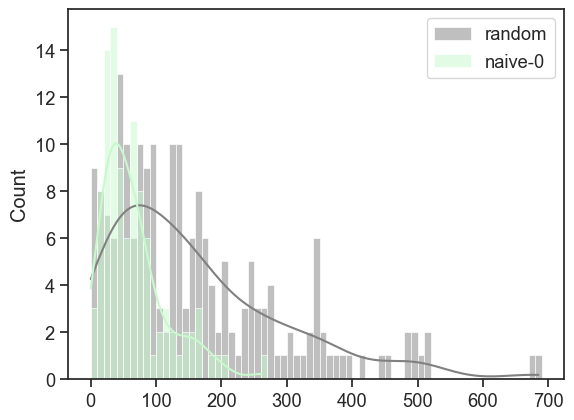

In [11]:
num_nan_random = number_of_nans(data_random, normalize=False)
num_nan_naive_naive_0 = number_of_nans(data_naive_naive_0, normalize=False)
sns.histplot(num_nan_random, binwidth=10, label='random', kde=True, color=mypalette['random'][0])
sns.histplot(num_nan_naive_naive_0, binwidth=10, kde=True,  label='naive-0', color=mypalette['naive'][0])
plt.legend(loc='upper right')

In [10]:
def make_num_evals_df(all_data):
    ''' make data frame of number of evals and number of nans
    '''
    frame = {'method': [], 'planner': [], 'params': [], 'desc': [], 'num_evals': [], 'num_nans': [],
             'num_evals_after': [], 'num_nans_after': [], 'feas_idxs': []}
    for idx, data in enumerate(all_data):
        print(f'method : {data["method"]} [{idx}/{len(all_data)}]')
        num_evals, num_nans, num_evals_after, num_nans_after, feas_idxs = get_num_evals(data['data'])
        assert len(num_evals)==len(num_nans)
        
        frame['method'].extend( [data['method']]*len(num_evals) )
        frame['planner'].extend( [data['planner']]*len(num_evals) )
        frame['params'].extend( [data['params']]*len(num_evals) )
        frame['desc'].extend( [data['desc']]*len(num_evals))
        frame['num_evals'].extend(num_evals)
        frame['num_nans'].extend(num_nans)
        frame['num_evals_after'].extend(num_evals_after)
        frame['num_nans_after'].extend(num_nans_after)
        frame['feas_idxs'].extend(feas_idxs)
    
    return pd.DataFrame(frame)

In [11]:
df_res = make_num_evals_df(all_data)

method : random [0/48]
method : naive_gryffin-naive-0 [1/48]
method : naive_gryffin-naive-fia-1000 [2/48]
method : naive_gryffin-fwa-0 [3/48]
method : naive_gryffin-fca-0.2 [4/48]
method : naive_gryffin-fca-0.5 [5/48]
method : naive_gryffin-fca-0.8 [6/48]
method : naive_gryffin-fia-0.5 [7/48]
method : naive_gryffin-fia-1 [8/48]
method : naive_gryffin-fia-2 [9/48]
method : static_gryffin-naive-0 [10/48]
method : static_gryffin-naive-fia-1000 [11/48]
method : static_gryffin-fwa-0 [12/48]
method : static_gryffin-fca-0.2 [13/48]
method : static_gryffin-fca-0.5 [14/48]
method : static_gryffin-fca-0.8 [15/48]
method : static_gryffin-fia-0.5 [16/48]
method : static_gryffin-fia-1 [17/48]
method : static_gryffin-fia-2 [18/48]
method : dynamic_gryffin-naive-0 [19/48]
method : dynamic_gryffin-naive-fia-1000 [20/48]
method : dynamic_gryffin-fwa-0 [21/48]
method : dynamic_gryffin-fca-0.2 [22/48]
method : dynamic_gryffin-fca-0.5 [23/48]
method : dynamic_gryffin-fca-0.8 [24/48]
method : dynamic_gryff

In [12]:
print(df_res.shape)
df_res.head()

(3114, 9)


,method,planner,params,desc,num_evals,num_nans,num_evals_after,num_nans_after,feas_idxs
0,random,random,random,False,493,445,491,443,2
1,random,random,random,False,144,129,141,126,3
2,random,random,random,False,289,257,258,226,31
3,random,random,random,False,36,31,30,25,6
4,random,random,random,False,310,279,302,271,8


In [15]:
df_res[df_res['planner']=='random']['num_evals'].mean()

174.025

[<matplotlib.patches.Rectangle object at 0x16c45e230>, <matplotlib.patches.Rectangle object at 0x16cc00c40>, <matplotlib.patches.Rectangle object at 0x16cc2feb0>, <matplotlib.patches.Rectangle object at 0x16cc2fd30>, <matplotlib.patches.Rectangle object at 0x16cc5aa70>]


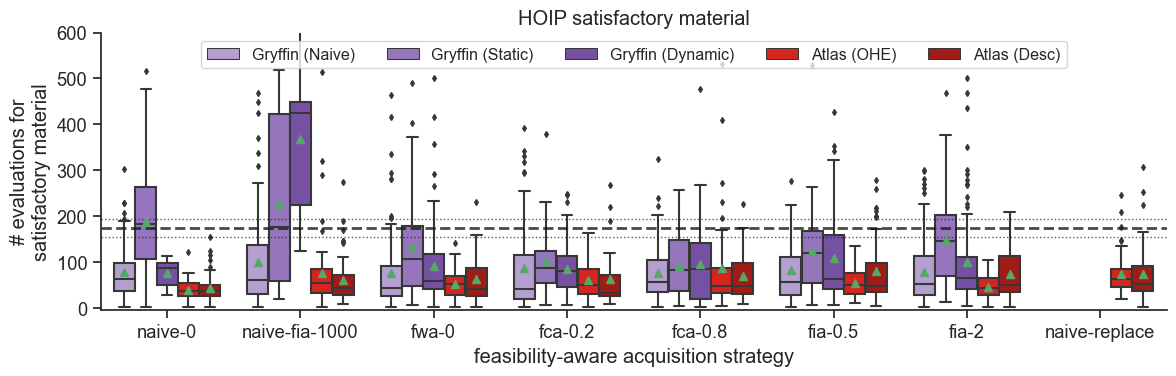

In [16]:
#--------------------------------
# [NUM EVAL] GRYFFIN VS. BOTORCH
#--------------------------------

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

pal = ['#B497D8', '#946BC7', '#7543B1', '#F50800', '#B80600']

# compute random sampling baseline
random_mean_num_evals = df_res[df_res['planner']=='random']['num_evals'].mean()
random_stderr_num_evals = df_res[df_res['planner']=='random']['num_evals'].std() / np.sqrt(200)

data = df_res[
        ~(df_res['planner']=='random')&\
        ~(df_res['params']=='fca-0.5')&\
        ~(df_res['params']=='fia-1')
        ]

labels = ['Gryffin (Naive)', 'Gryffin (Static)', 'Gryffin (Dynamic)', 'Atlas (OHE)', 'Atlas (Desc)']


v_ = sns.boxplot(data=data, x='params', y='num_evals', hue='desc', 
                     showmeans=True, ax=ax, linewidth=1.5,  palette=pal, saturation=0.75,
                    fliersize=3.)

handles, _ = ax.get_legend_handles_labels()

print(handles)

ax.legend(handles, labels, loc='upper center', ncol=5,fontsize=11.5)

ax.set_ylim(-5, 600)

ax.axhline(random_mean_num_evals, lw=2, ls='--', c='k', alpha=0.8)
ax.axhline(random_mean_num_evals+1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
ax.axhline(random_mean_num_evals-1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
# ax.legend(loc='upper center', ncol=3)
ax.set_xlabel('feasibility-aware acquisition strategy')
ax.set_ylabel('# evaluations for\nsatisfactory material')
ax.set_title('HOIP satisfactory material')
# ax.set_yscale('log')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.tight_layout()
#plt.savefig('hoip-num-evals-boxplot.png', dpi=400)

[<matplotlib.patches.Rectangle object at 0x16c45e170>, <matplotlib.patches.Rectangle object at 0x16cf74730>, <matplotlib.patches.Rectangle object at 0x16cfaff40>, <matplotlib.patches.Rectangle object at 0x16cfd98a0>, <matplotlib.patches.Rectangle object at 0x16cfdaef0>]


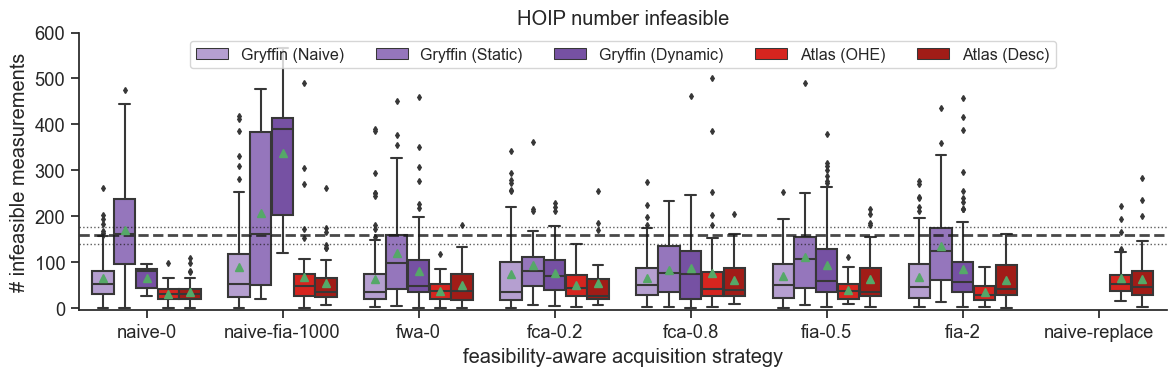

In [17]:
#--------------------------------
# [NUM NANS] GRYFFIN VS. BOTORCH
#--------------------------------

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

pal = ['#B497D8', '#946BC7', '#7543B1', '#F50800', '#B80600']

# compute random sampling baseline
random_mean_num_evals = df_res[df_res['planner']=='random']['num_nans'].mean()
random_stderr_num_evals = df_res[df_res['planner']=='random']['num_nans'].std() / np.sqrt(200)

data = df_res[
        ~(df_res['planner']=='random')&\
        ~(df_res['params']=='fca-0.5')&\
        ~(df_res['params']=='fia-1')
        ]

labels = ['Gryffin (Naive)', 'Gryffin (Static)', 'Gryffin (Dynamic)', 'Atlas (OHE)', 'Atlas (Desc)']


v_ = sns.boxplot(data=data, x='params', y='num_nans', hue='desc', 
                     showmeans=True, ax=ax, linewidth=1.5,  palette=pal, saturation=0.75,
                    fliersize=3.)

handles, _ = ax.get_legend_handles_labels()

print(handles)

ax.legend(handles, labels, loc='upper center', ncol=5,fontsize=11.5)

ax.set_ylim(-5, 600)

ax.axhline(random_mean_num_evals, lw=2, ls='--', c='k', alpha=0.8)
ax.axhline(random_mean_num_evals+1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
ax.axhline(random_mean_num_evals-1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
# ax.legend(loc='upper center', ncol=3)
ax.set_xlabel('feasibility-aware acquisition strategy')
ax.set_ylabel('# infeasible measurements')
ax.set_title('HOIP number infeasible')
# ax.set_yscale('log')
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.tight_layout()
#plt.savefig('hoip-num-nans-boxplot.png', dpi=400)

[<matplotlib.patches.Rectangle object at 0x16d376440>, <matplotlib.patches.Rectangle object at 0x16d32bf10>, <matplotlib.patches.Rectangle object at 0x16d3a3910>, <matplotlib.patches.Rectangle object at 0x16d3a3790>, <matplotlib.patches.Rectangle object at 0x16d3ca3b0>]
[<matplotlib.patches.Rectangle object at 0x16cee0640>, <matplotlib.patches.Rectangle object at 0x16d374d90>, <matplotlib.patches.Rectangle object at 0x16cee0d00>, <matplotlib.patches.Rectangle object at 0x16cee0670>, <matplotlib.patches.Rectangle object at 0x16cc039d0>]


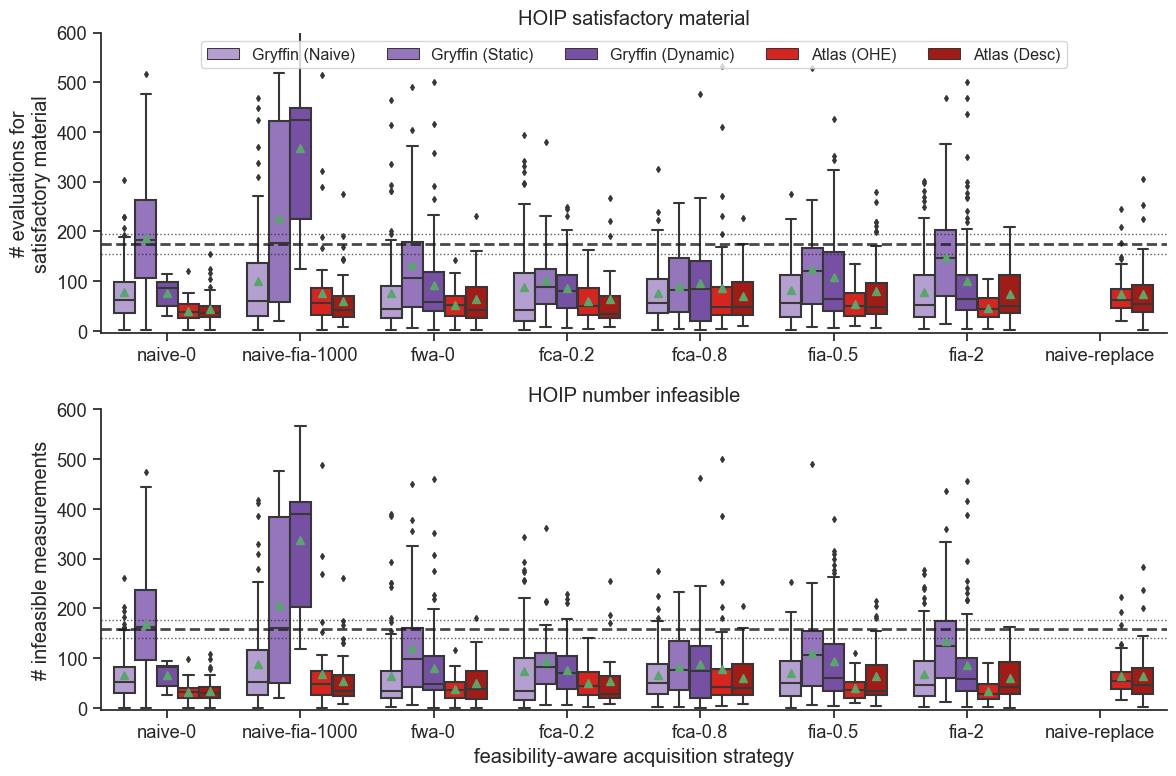

In [18]:
#-------------------------------------------
# [NUM EVALS, NUM NANS] GRYFFIN VS. BOTORCH
#-------------------------------------------

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

pal = ['#B497D8', '#946BC7', '#7543B1', '#F50800', '#B80600']


#-----------
# NUM EVALS
#-----------

# compute random sampling baseline
random_mean_num_evals = df_res[df_res['planner']=='random']['num_evals'].mean()
random_stderr_num_evals = df_res[df_res['planner']=='random']['num_evals'].std() / np.sqrt(200)

data = df_res[
        ~(df_res['planner']=='random')&\
        ~(df_res['params']=='fca-0.5')&\
        ~(df_res['params']=='fia-1')
        ]

labels = ['Gryffin (Naive)', 'Gryffin (Static)', 'Gryffin (Dynamic)', 'Atlas (OHE)', 'Atlas (Desc)']


v_ = sns.boxplot(data=data, x='params', y='num_evals', hue='desc', 
                     showmeans=True, ax=axes[0], linewidth=1.5,  palette=pal, saturation=0.75,
                    fliersize=3.)

handles, _ = axes[0].get_legend_handles_labels()

print(handles)

axes[0].legend(handles, labels, loc='upper center', ncol=5,fontsize=11.5)

axes[0].set_ylim(-5, 600)

axes[0].axhline(random_mean_num_evals, lw=2, ls='--', c='k', alpha=0.8)
axes[0].axhline(random_mean_num_evals+1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
axes[0].axhline(random_mean_num_evals-1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
# axes[0].legend(loc='upper center', ncol=3)
axes[0].set_xlabel('')
axes[0].set_ylabel('# evaluations for\nsatisfactory material')
axes[0].set_title('HOIP satisfactory material')
#axes[0].set_yscale('log')
axes[0].spines.right.set_visible(False)
axes[0].spines.top.set_visible(False)


#-----------
# NUM NANS
#-----------

# compute random sampling baseline
random_mean_num_evals = df_res[df_res['planner']=='random']['num_nans'].mean()
random_stderr_num_evals = df_res[df_res['planner']=='random']['num_nans'].std() / np.sqrt(200)

data = df_res[
        ~(df_res['planner']=='random')&\
        ~(df_res['params']=='fca-0.5')&\
        ~(df_res['params']=='fia-1')
        ]

labels = ['Gryffin (Naive)', 'Gryffin (Static)', 'Gryffin (Dynamic)', 'Atlas (OHE)', 'Atlas (Desc)']


v_ = sns.boxplot(data=data, x='params', y='num_nans', hue='desc', 
                     showmeans=True, ax=axes[1], linewidth=1.5,  palette=pal, saturation=0.75,
                    fliersize=3.)

handles, _ = axes[1].get_legend_handles_labels()

print(handles)

axes[1].legend(handles, labels, loc='upper center', ncol=5,fontsize=11.5)

axes[1].set_ylim(-5, 600)

axes[1].axhline(random_mean_num_evals, lw=2, ls='--', c='k', alpha=0.8)
axes[1].axhline(random_mean_num_evals+1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
axes[1].axhline(random_mean_num_evals-1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
# axes[1].legend(loc='upper center', ncol=3)
axes[1].set_xlabel('feasibility-aware acquisition strategy')
axes[1].set_ylabel('# infeasible measurements')
axes[1].set_title('HOIP number infeasible')
# axes[1].set_yscale('log')
axes[1].spines.right.set_visible(False)
axes[1].spines.top.set_visible(False)

axes[1].legend([],[], frameon=False)

plt.tight_layout()
# plt.savefig('hoip_num_eval_num_nan.png', dpi=400)

[<matplotlib.patches.Rectangle object at 0x16d4dfe80>, <matplotlib.patches.Rectangle object at 0x16d4bfe80>]
[<matplotlib.patches.Rectangle object at 0x16d6133d0>, <matplotlib.patches.Rectangle object at 0x16df06230>]


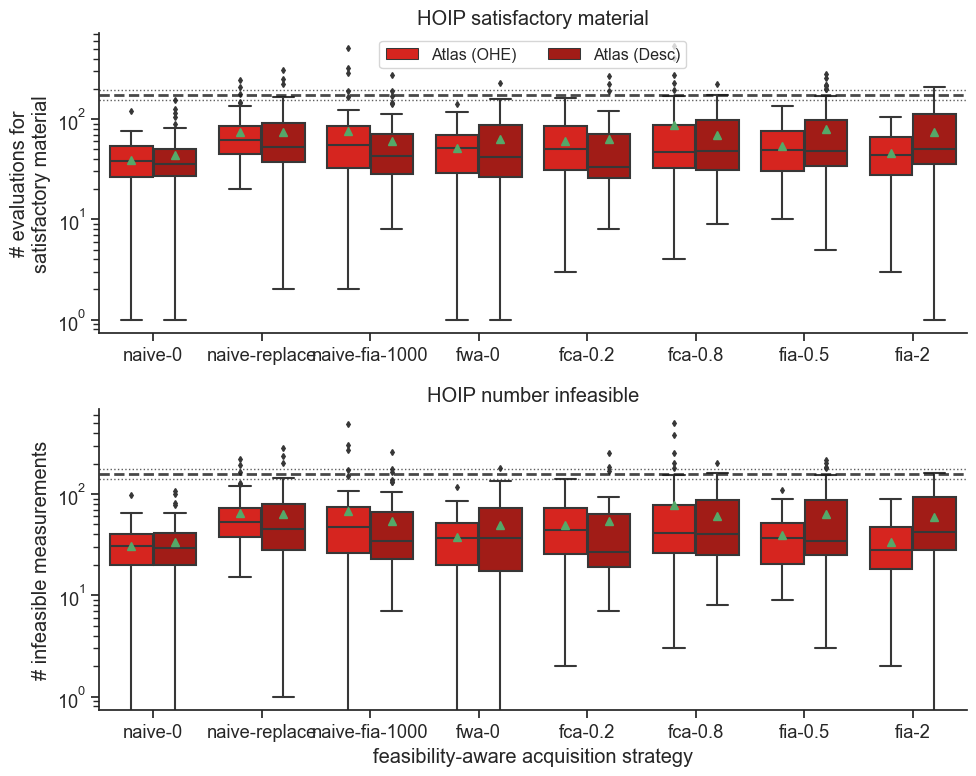

In [23]:
#-------------------------------------------
# [NUM EVALS, NUM NANS] BOTORCH
#-------------------------------------------

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

pal = ['#F50800', '#B80600']


#-----------
# NUM EVALS
#-----------

# compute random sampling baseline
random_mean_num_evals = df_res[df_res['planner']=='random']['num_evals'].mean()
random_stderr_num_evals = df_res[df_res['planner']=='random']['num_evals'].std() / np.sqrt(200)

data = df_res[
        ~(df_res['planner']=='random')&\
        ~(df_res['planner']=='gryffin')&\
        ~(df_res['params']=='fca-0.5')&\
        ~(df_res['params']=='fia-1')
        ]

labels = ['Atlas (OHE)', 'Atlas (Desc)']


v_ = sns.boxplot(data=data, x='params', y='num_evals', hue='desc', 
                     showmeans=True, ax=axes[0], linewidth=1.5,  palette=pal, saturation=0.75,
                    fliersize=3.)

handles, _ = axes[0].get_legend_handles_labels()

print(handles)

axes[0].legend(handles, labels, loc='upper center', ncol=5,fontsize=11.5)

# axes[0].set_ylim(-5, 600)
axes[0].set_yscale('log')

axes[0].axhline(random_mean_num_evals, lw=2, ls='--', c='k', alpha=0.8)
axes[0].axhline(random_mean_num_evals+1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
axes[0].axhline(random_mean_num_evals-1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
# axes[0].legend(loc='upper center', ncol=3)
axes[0].set_xlabel('')
axes[0].set_ylabel('# evaluations for\nsatisfactory material')
axes[0].set_title('HOIP satisfactory material')
#axes[0].set_yscale('log')
axes[0].spines.right.set_visible(False)
axes[0].spines.top.set_visible(False)

#-----------
# NUM NANS
#-----------

# compute random sampling baseline
random_mean_num_evals = df_res[df_res['planner']=='random']['num_nans'].mean()
random_stderr_num_evals = df_res[df_res['planner']=='random']['num_nans'].std() / np.sqrt(200)

data = df_res[
        ~(df_res['planner']=='random')&\
        ~(df_res['planner']=='gryffin')&\
        ~(df_res['params']=='fca-0.5')&\
        ~(df_res['params']=='fia-1')
    ]

labels = [ 'Atlas (OHE)', 'Atlas (Desc)']


v_ = sns.boxplot(data=data, x='params', y='num_nans', hue='desc', 
                     showmeans=True, ax=axes[1], linewidth=1.5,  palette=pal, saturation=0.75,
                    fliersize=3.)

handles, _ = axes[1].get_legend_handles_labels()

print(handles)

axes[1].legend(handles, labels, loc='upper center', ncol=5,fontsize=11.5)

# axes[1].set_ylim(-5, 600)
axes[1].set_yscale('log')

axes[1].axhline(random_mean_num_evals, lw=2, ls='--', c='k', alpha=0.8)
axes[1].axhline(random_mean_num_evals+1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
axes[1].axhline(random_mean_num_evals-1.96*random_stderr_num_evals, lw=1, ls=':', c='k', alpha=0.7)
# axes[1].legend(loc='upper center', ncol=3)
axes[1].set_xlabel('feasibility-aware acquisition strategy')
axes[1].set_ylabel('# infeasible measurements')
axes[1].set_title('HOIP number infeasible')
# axes[1].set_yscale('log')
axes[1].spines.right.set_visible(False)
axes[1].spines.top.set_visible(False)

axes[1].legend([],[], frameon=False)

plt.tight_layout()
# plt.savefig('hoip_num_eval_num_nan.png', dpi=400)

In [23]:
def make_table(
    data,
    filename='mytable.txt',
    metric='num_evals_after',
    signif=[['dummy', 'dummy', 'dummy']],
    strategies={'random':['False'], 'botorch':['wodesc', 'desc']},
    constraints=['naive-0', 'naive-replace', 'naive-fia-1000', 'fwa-0', 
                 'fca-0.2', 'fca-0.5', 'fca-0.8', 
                 'fia-0.5', 'fia-1', 'fia-2'],
    num_dec=1,
):
    ''' generate a latex table with the optimization experiment results
    '''
    gb = data.groupby(by=['planner', 'desc', 'params'])
    
    num_cols = len(constraints)+1 # plus one for planner col
    num_rows = np.sum([len(val) for key, val in strategies.items()])-1 # minus 1 for random sampling
    
    col_headers = ['planner']+constraints
    
    col_str = ' '.join(['c' for _ in range(num_cols)])
    f = ''
    
    # table header
    f+='\\begin{table}[!ht]\n\centering\n\caption{\ldots}\n\label{\ldots}\n\\begin{tabular}{'+col_str+'}\n'
    f+= '\\toprule\n'
    f+= ' & '.join([header for header in col_headers]) + '\\\ \n'
    f+= '\midrule\n'
    
    # random sampling first
    f+='random & '
    group = gb.get_group(('random', False, 'random'))
    mean, sem = group.mean()[metric], group.sem()[metric]
    f += f'{round(mean,num_dec)} $\pm$ {round(sem,num_dec)} & '
    to_add = ''.join([f'$-$ & ' for _ in range(num_cols-3)])
    f+= to_add 
    f+= '$-$ \\\ \n'
    
    for alg in ['botorch']: #'gryffin']:
        for desc in strategies[alg]:
            f += f'{alg}-{desc} & '
            for param in constraints:
                group = gb.get_group((alg, desc, param))
                mean, sem = group.mean()[metric], group.sem()[metric]

                if not [alg, desc, param] in signif:
                    if param == constraints[-1]:
                        f += f'${round(mean,num_dec)} \pm {round(sem,num_dec)}$ \\\ \n'
                    else:
                        f += f'${round(mean,num_dec)} \pm {round(sem,num_dec)}$ &'
                else:
                    if param == constraints[-1]:
                        f+='$\\bm{'
                        f += f'{round(mean,num_dec)} \pm {round(sem,num_dec)}'
                        f+= '}$ \\\ \n'
                    else:
                        f+='$\\bm{'
                        f += f'{round(mean,num_dec)} \pm {round(sem,num_dec)}'
                        f+= '}$ & '

    # end of table
    f+='\\bottomrule\n'
    f+='\end{tabular}\n'
    f+='\end{table}\n'

    # write table to file
    with open(filename, 'w') as file:
        file.write(f)
    
 

In [24]:
def get_pvalues(
        data, 
        metric, # 'botorch':['wodesc', 'desc']
        strategies={
                'random':['False'], 
                'botorch':['wodesc', 'desc'],  
#                 'gryffin':['naive', 'static', 'dynamic']
        },
        constraints=['naive-0', 'naive-replace', 'naive-fia-1000', 'fwa-0', 
                     'fca-0.2', 'fca-0.5', 'fca-0.8', 
                     'fia-0.5', 'fia-1', 'fia-2'],
    ):
    res = {'planner':[],'desc':[],'params':[], 'metric': []}
    gb = data.groupby(by=['planner', 'desc', 'params'])
    # random first
    #random = data[(data['planner']=='random')&(data['desc']==False)&(data['param']=='random')][metric].to_numpy()
    group = gb.get_group(('random', False, 'random'))
    mean = group.mean()[metric]
    
    res['planner'].append('random')
    res['desc'].append(False)
    res['params'].append('random')
    res['metric'].append(mean)
    
    for alg in ['botorch']: #'gryffin']:
        for desc in strategies[alg]:
            for param in constraints:
                group = gb.get_group((alg, desc, param))
                mean = group.mean()[metric]
                res['planner'].append(alg)
                res['desc'].append(desc)
                res['params'].append(param)
                res['metric'].append(mean)
                
    df = pd.DataFrame(res).sort_values(by='metric', ascending=True)
    
    signif = []
    
    best = df.iloc[0, :][['planner', 'desc', 'params']].tolist()
    best_res = data[
            (data['planner']==best[0])&\
            (data['desc']==best[1])&\
            (data['params']==best[2])][metric].to_numpy()
    
    print('BEST : ', '-'.join(best))
    signif.append(best)
    
    stop = False
    idx=1
    while not stop:
        
        new = df.iloc[idx, :][['planner', 'desc', 'params']].tolist()
        new_res = data[
            (data['planner']==new[0])&\
            (data['desc']==new[1])&\
            (data['params']==new[2])][metric].to_numpy()
        
        _, pval = stats.ttest_ind(best_res, new_res, equal_var=False)
        
        print('NEW : ', '-'.join(new))
        print(pval)
        if pval<0.05:
            stop=True
        else:
            signif.append(new)
            idx+=1
        
    
    
    return signif

In [25]:
signif = get_pvalues(df_res, 'num_evals_after')
print(signif)
make_table(df_res, filename='hoip_num_evals_after.txt', metric='num_evals_after', signif=signif)

BEST :  botorch-wodesc-naive-0
NEW :  botorch-desc-naive-0
0.3574033981897896
NEW :  botorch-wodesc-fia-2
0.16530369976147252
NEW :  botorch-wodesc-fia-1
0.027593036623248326
[['botorch', 'wodesc', 'naive-0'], ['botorch', 'desc', 'naive-0'], ['botorch', 'wodesc', 'fia-2']]


/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_38200/741198869.py:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = group.mean()[metric]
/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_38200/741198869.py:29: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = group.mean()[metric]
/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_38200/385645204.py:33: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, 

In [26]:
signif = get_pvalues(df_res, 'num_nans_after')
make_table(df_res, filename='hoip_num_nans_after.txt', metric='num_nans_after', signif=signif)

BEST :  botorch-wodesc-naive-0
NEW :  botorch-desc-naive-0
0.41587545237813284
NEW :  botorch-wodesc-fia-2
0.33952378315446763
NEW :  botorch-wodesc-fia-1
0.08982651675920818
NEW :  botorch-wodesc-fia-0.5
0.04560987462139787


/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_38200/741198869.py:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = group.mean()[metric]
/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_38200/741198869.py:29: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = group.mean()[metric]
/var/folders/b7/skyhqqz10kv5ht16t37st2pm0000gn/T/ipykernel_38200/385645204.py:33: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, 